# ** Calculate the mutability model from the trip and mut data dictionaries ** 

** import the data ** 

In [1]:
import matplotlib.pyplot as plt
import json 
import numpy as np 

In [2]:
muts_dict = json.loads(open("muts_2021_01_26_yeast.txt").readlines()[0])
trips_dict = json.loads(open("trips_2021_01_26_yeast.txt").readlines()[0])

** calculate model ** 

In [3]:
model = {}
for triplet, value in muts_dict.items(): 
    n_muts = value[0]

    #standardize the into triplets 
    into_trip_dict = {}
    for into_trip,into_count in value[1].items(): 
        if n_muts != 0:                                    #if no muts for that triplet,then keep it the same 
            into_trip_dict[into_trip] = into_count/n_muts
            
    #now divide the total num muts by the number tiplwts and create model value 
    model[triplet] = [n_muts/trips_dict[triplet], into_trip_dict]

In [4]:
with open('model_2021_01_26_yeast.txt', 'w') as outfile:
    json.dump(model, outfile)

** analyzing mouse mut model ** 

In [5]:
muts_list = []
for key, value in model.items(): 
    muts_list.append(value[0])

In [6]:
max(muts_list), min(muts_list), max(muts_list)/ min(muts_list)

(0.00011916021836110015, 9.556004156861808e-06, 12.469670000670275)

In [7]:
plt.style.use('seaborn-ticks')

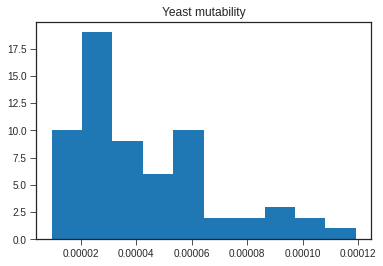

In [8]:
plt.hist(muts_list)
plt.title("Yeast mutability")
plt.show()

In [9]:
cpg_muts = []
non_cgp_muts = []
for key,value in model.items(): 
    if "CG" in key: 
        cpg_muts.append(value[0])
    else: 
        non_cgp_muts.append(value[0])

In [10]:
np.mean(cpg_muts), np.mean(non_cgp_muts)

(8.366789316759836e-05, 3.7566646020130835e-05)